<a href="https://colab.research.google.com/github/alawiiii99/ali.project/blob/main/Bone_fraction_classification_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#My dataset is available in googledrive; so I am accessing my drive from colab
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
#Once this is executed, you will see your drive appearing on the left hand side

Mounted at /content/drive


In [ ]:
# Define paths to the dataset
train_dir = '/content/drive/MyDrive/BoneFraction/train'  # Update with your actual path
test_dir = '/content/drive/MyDrive/BoneFraction/test'    # Update with your actual path

In [ ]:
import os
print(len(os.listdir('/content/drive/MyDrive/BoneFraction/train/fractured')))
print(len(os.listdir('/content/drive/MyDrive/BoneFraction/train/notfractured')))
print(len(os.listdir('/content/drive/MyDrive/BoneFraction/test/fractured')))
print(len(os.listdir('/content/drive/MyDrive/BoneFraction/test/notfractured')))

504
715
238
262


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerator for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Split 20% of the images for validation
)

# Load and prepare training data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',  # 'binary' for binary classification (cats vs. dogs)
    subset='training'  # Specify 'training' for the training set
)

# Create ImageDataGenerator for validation set
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Note: Using the same validation split as in the training set
)

# Load and prepare validation data
validation_data = validation_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',
    subset='validation'  # Specify 'validation' for the validation set
)

Found 976 images belonging to 2 classes.
Found 243 images belonging to 2 classes.


In [ ]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,UpSampling2D, Dropout

In [ ]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))  # 32 filters
#model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
#model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
#model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu')) #feature reduction
#model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(64,activation='relu'))
#model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(1,activation='sigmoid'))  #output layer

In [ ]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy']) #binary_crossentropy - binary classification

In [ ]:
history = model.fit(train_data, epochs=30, validation_data=validation_data)

Epoch 1/30
31/31 [==============================] - 238s 7s/step - loss: 0.3979 - accuracy: 0.7920 - val_loss: 0.2458 - val_accuracy: 0.8889
Epoch 2/30
31/31 [==============================] - 181s 6s/step - loss: 0.0891 - accuracy: 0.9713 - val_loss: 0.1591 - val_accuracy: 0.9588
Epoch 3/30
31/31 [==============================] - 175s 6s/step - loss: 0.0432 - accuracy: 0.9908 - val_loss: 0.2108 - val_accuracy: 0.9630
Epoch 4/30
31/31 [==============================] - 174s 6s/step - loss: 0.0167 - accuracy: 0.9959 - val_loss: 0.2185 - val_accuracy: 0.9671
Epoch 5/30
31/31 [==============================] - 185s 6s/step - loss: 0.0152 - accuracy: 0.9959 - val_loss: 0.3683 - val_accuracy: 0.9671
Epoch 6/30
31/31 [==============================] - 185s 6s/step - loss: 4.8664e-04 - accuracy: 1.0000 - val_loss: 0.4110 - val_accuracy: 0.9671
Epoch 7/30
31/31 [==============================] - 175s 6s/step - loss: 3.6526e-05 - accuracy: 1.0000 - val_loss: 0.3850 - val_accuracy: 0.9671
Epoch

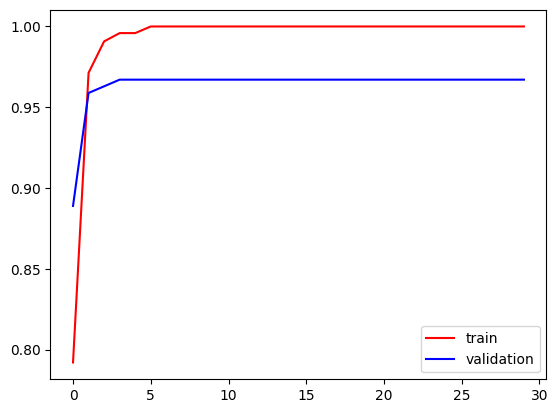

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

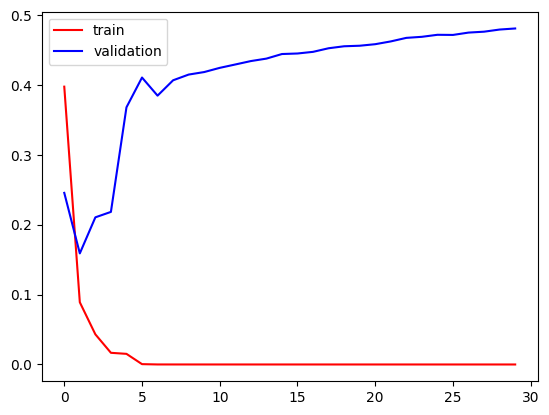

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 500 images belonging to 2 classes.


In [ ]:
#predict the test data
predictions = model.predict(test_data)
print(predictions)

16/16 [==============================] - 126s 8s/step
[[1.00000000e+00]
 [9.99721467e-01]
 [1.00000000e+00]
 [1.22729223e-02]
 [1.48879522e-02]
 [9.99985278e-01]
 [9.99972284e-01]
 [3.00996769e-02]
 [9.99999821e-01]
 [6.00023895e-07]
 [1.00000000e+00]
 [1.99045513e-09]
 [9.97525174e-09]
 [1.02793358e-01]
 [9.39305842e-01]
 [5.56186318e-01]
 [9.99998629e-01]
 [1.00000000e+00]
 [3.61321213e-08]
 [9.99122918e-01]
 [9.99999464e-01]
 [9.99999881e-01]
 [1.20277177e-09]
 [9.99862731e-01]
 [8.33367638e-04]
 [7.34077096e-02]
 [6.44242585e-01]
 [9.99988854e-01]
 [9.99856770e-01]
 [9.99999881e-01]
 [1.00000000e+00]
 [1.56555957e-09]
 [3.63065861e-04]
 [9.99988854e-01]
 [4.68327329e-14]
 [1.55129537e-01]
 [1.53677172e-06]
 [9.99975860e-01]
 [9.99999940e-01]
 [9.49522913e-01]
 [1.00000000e+00]
 [9.99134302e-01]
 [9.99991596e-01]
 [9.99997556e-01]
 [1.00000000e+00]
 [1.00000000e+00]
 [8.41098309e-01]
 [4.17370058e-04]
 [1.01308024e-05]
 [1.00000000e+00]
 [9.99998748e-01]
 [6.39455848e-08]
 [9.999558

In [ ]:
len(predictions)

500

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[ 93 145]
 [118 144]]
Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.39      0.41       238
           1       0.50      0.55      0.52       262

    accuracy                           0.47       500
   macro avg       0.47      0.47      0.47       500
weighted avg       0.47      0.47      0.47       500

